In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



## Problem Statement
- Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.
- There are different factors that chance the price of the house. Let's see how house are differs from various prices

In [2]:
# Load csv file
df = pd.read_csv('bengaluru_house_prices.csv')
df.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13135,Super built-up Area,Ready To Move,Kumarapalli,3 BHK,BMmesHo,1486,2.0,2.0,65.00
7269,Super built-up Area,Ready To Move,Nehru Nagar,2 BHK,Veyalin,967,2.0,2.0,41.10
12949,Super built-up Area,Ready To Move,Jakkur,3 BHK,BrdgeNo,1710,3.0,2.0,110.00
1794,Super built-up Area,Ready To Move,Byrasandra,3 BHK,ViisePa,1690,2.0,2.0,55.00
3330,Super built-up Area,Ready To Move,Hennur Road,3 BHK,NaN,1975,3.0,3.0,123.00
1998,Super built-up Area,18-Jul,2nd Block Hrbr Layout,3 BHK,NaN,1550,3.0,3.0,110.00
8944,Built-up Area,Ready To Move,Sanjeevini Nagar,3 BHK,Betatsi,2250,3.0,NaN,180.00
561,Super built-up Area,21-Feb,Bannerghatta Road,1 BHK,Hiatei,595,1.0,1.0,33.32
10876,Built-up Area,18-Dec,Electronic City,2 BHK,NaN,1025,2.0,1.0,29.60
13025,Super built-up Area,Ready To Move,Chamrajpet,3 BHK,NaN,1650,3.0,2.0,115.00


### where,
- area_type : Area where the house lies.
- availability: It Covers, if the house is ready to sell, when to sell
- location: Where the house is actually located.
- size: Stores the number of bedroom.
- Society - Which socety does the house lies.
- total_sqft: Area of the house
- bath: bathroom inside house
- balcony: Balcony of the house.
- price: Target column, price of the house. 

In [3]:
print(f' There are {df.shape[0]} rows and {df.shape[1]} columns in our dataset')

 There are 13320 rows and 9 columns in our dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Appart from (bath, balcony, price) all features are objct type

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


##  Exploratory Data Analysis and Data Cleaning
- EDA is an approach of analyzing data sets to summarize their main characteristics
- Data cleaning is the process of detecting and correcting corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

In [6]:
# In the dataset availability really doesn't effect the price of the house. so it is safe to remove it.

In [7]:
df.drop('availability', axis=1, inplace=True)
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [8]:
df['size'].nunique

<bound method IndexOpsMixin.nunique of 0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object>

Bhk, beedroom simply means no. of bed is in the house, so i will keep the first number and remove last word.

In [9]:
df['bed'] = df['size'].str.split(' ', expand=True)[0]

In [10]:
df.head()

,area_type,location,size,society,total_sqft,bath,balcony,price,bed
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


Now we don't need size column, let's drop it too.


In [11]:
df.drop('size', inplace=True, axis=1)

In [12]:
# Let's find the missing data
df.isnull().sum()

area_type        0
location         1
society       5502
total_sqft       0
bath            73
balcony        609
price            0
bed             16
dtype: int64

### Visualize missing values


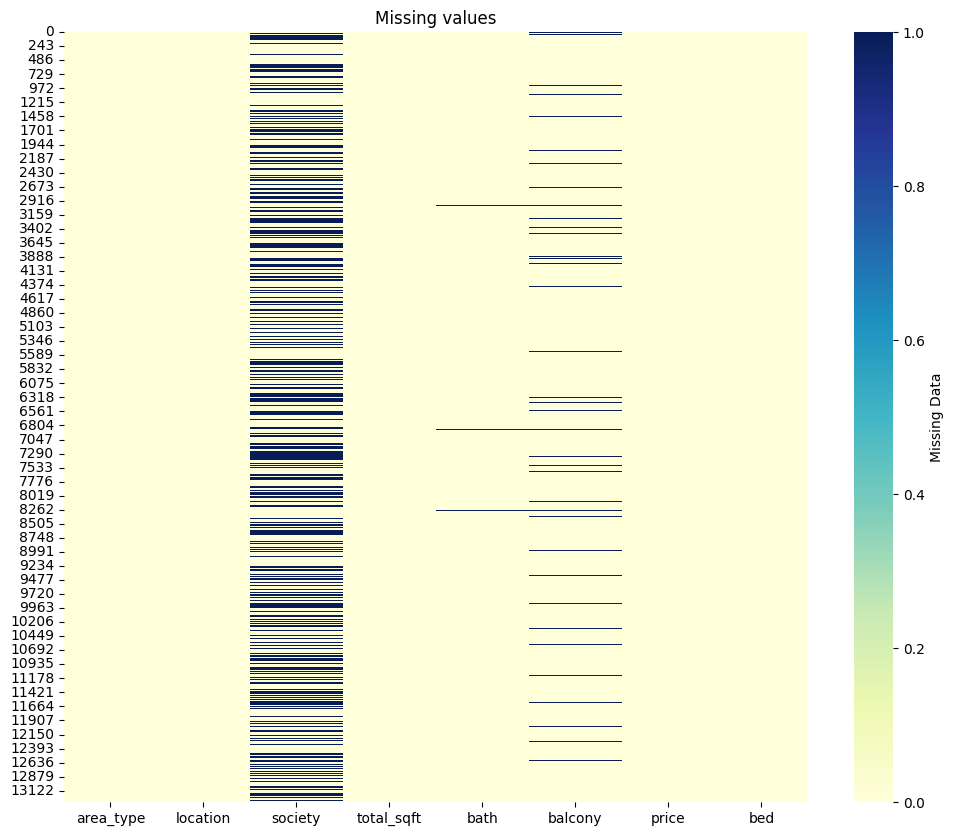

In [13]:
import seaborn as sns

plt.figure(figsize=(12,10))

sns.heatmap(data=df.isna(),
    cmap="YlGnBu",  # Set a yellow -> green -> blue color gradient
    cbar_kws={"label": "Missing Data"})
plt.title('Missing values')
plt.show()

We can see there is huge number of missing data in society. After society Balcony has second highest missing values

In [14]:
fill_mode = ['bath', 'bed','balcony']

In [15]:
# let's fill missing values
for column in fill_mode:
    mode_val = df[column].mode()[0]
    df[column].fillna(mode_val, inplace=True)

df.sample(10)

/tmp/ipykernel_13338/1294859250.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_val, inplace=True)


,area_type,location,society,total_sqft,bath,balcony,price,bed
9534,Super built-up Area,Vajarahalli,NaN,551,1.0,1.0,30.0,1
7330,Plot Area,Malleshpalya,NaN,1200,3.0,1.0,149.0,3
9207,Built-up Area,Hennur Road,DSeldpr,1297,2.0,1.0,49.9,2
6007,Super built-up Area,Dodda Nekkundi,NaN,1435,3.0,3.0,57.2,3
3999,Super built-up Area,Hormavu,Ocock R,1500,3.0,3.0,70.0,3
4099,Super built-up Area,Akshya Nagar,NaN,1380,2.0,1.0,75.0,2
9254,Super built-up Area,Harlur,BrriaIm,1386,2.0,2.0,85.0,2
10524,Plot Area,1st Block HRBR Layout,NaN,600,3.0,2.0,125.0,3
4609,Super built-up Area,Thanisandra,Bhmesy,1265,2.0,2.0,82.0,2
4449,Plot Area,Whitefield,NaN,1200,2.0,1.0,45.0,2


In [16]:
df.isnull().sum()

area_type        0
location         1
society       5502
total_sqft       0
bath             0
balcony          0
price            0
bed              0
dtype: int64

In [17]:
df['society'].unique

<bound method Series.unique of 0        Coomee 
1        Theanmp
2            NaN
3        Soiewre
4            NaN
          ...   
13315    ArsiaEx
13316        NaN
13317    Mahla T
13318    SollyCl
13319        NaN
Name: society, Length: 13320, dtype: object>

In [18]:
# fill society column using mode
df.fillna(df.society.mode()[0], inplace= True)
df.isnull().sum()

area_type     0
location      0
society       0
total_sqft    0
bath          0
balcony       0
price         0
bed           0
dtype: int64

In [19]:
df.sample(4)

,area_type,location,society,total_sqft,bath,balcony,price,bed
8124,Super built-up Area,Choodasandra,Maidsr,725,2.0,2.0,36.00,2
6202,Built-up Area,Ramamurthy Nagar,GrrvaGr,700,2.0,1.0,33.00,2
12724,Plot Area,HAL 2nd Stage,GrrvaGr,1000,7.0,3.0,260.00,8
3748,Super built-up Area,Lingadheeranahalli,Soiewre,1521,3.0,1.0,94.71,3


In [20]:
import re #regular expression

data = df
data['total_sqft'] = df['total_sqft'].str.split(r'[-.\D]', expand=True)[0]


In [21]:
data.sample(10)

,area_type,location,society,total_sqft,bath,balcony,price,bed
1145,Super built-up Area,Hosakerehalli,APncyla,1590,3.0,3.0,49.00,3
3249,Carpet Area,Indira Nagar,Gonorir,1875,3.0,1.0,180.00,3
2519,Built-up Area,Kodichikkanahalli,GrrvaGr,2700,7.0,2.0,125.00,5
7632,Built-up Area,Hebbal Kempapura,GonumPl,3408,3.0,3.0,260.00,3
5700,Super built-up Area,GM Palaya,GrrvaGr,1140,2.0,2.0,48.95,2
1690,Super built-up Area,Kaikondrahalli,Brtiael,1645,3.0,2.0,100.00,3
571,Super built-up Area,Sarjapur Road,Supleon,2100,3.0,2.0,125.00,3
1492,Plot Area,9th Phase JP Nagar,GrrvaGr,1200,6.0,2.0,195.00,7
5674,Built-up Area,Hoodi,GrrvaGr,948,2.0,1.0,75.00,2
4712,Built-up Area,Yelahanka,GrrvaGr,4000,5.0,2.0,220.00,5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13320 non-null  object 
 1   location    13320 non-null  object 
 2   society     13320 non-null  object 
 3   total_sqft  13320 non-null  object 
 4   bath        13320 non-null  float64
 5   balcony     13320 non-null  float64
 6   price       13320 non-null  float64
 7   bed         13320 non-null  object 
dtypes: float64(3), object(5)
memory usage: 832.6+ KB


In [23]:
col_to_int = ['bed', 'total_sqft']
data[col_to_int] = data[col_to_int].astype(int)

In [24]:
data.dtypes

area_type      object
location       object
society        object
total_sqft      int64
bath          float64
balcony       float64
price         float64
bed             int64
dtype: object

### Univariate Analysis
- Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable.

In [25]:
df.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

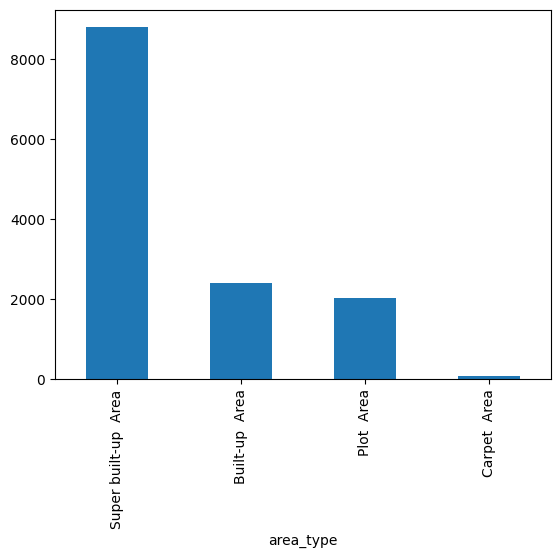

In [26]:
data.area_type.value_counts().plot(kind='bar')
plt.show()

In [27]:
def univariate_bar(data, x_label, y_label='Frequency'):
    value_counts = data[x_label].value_counts()
    value_counts.plot.bar(color = sns.color_palette('colorblind'),
                          figsize = (10,10))
    

    plt.title(f'Distribution of {x_label} int the dataset')

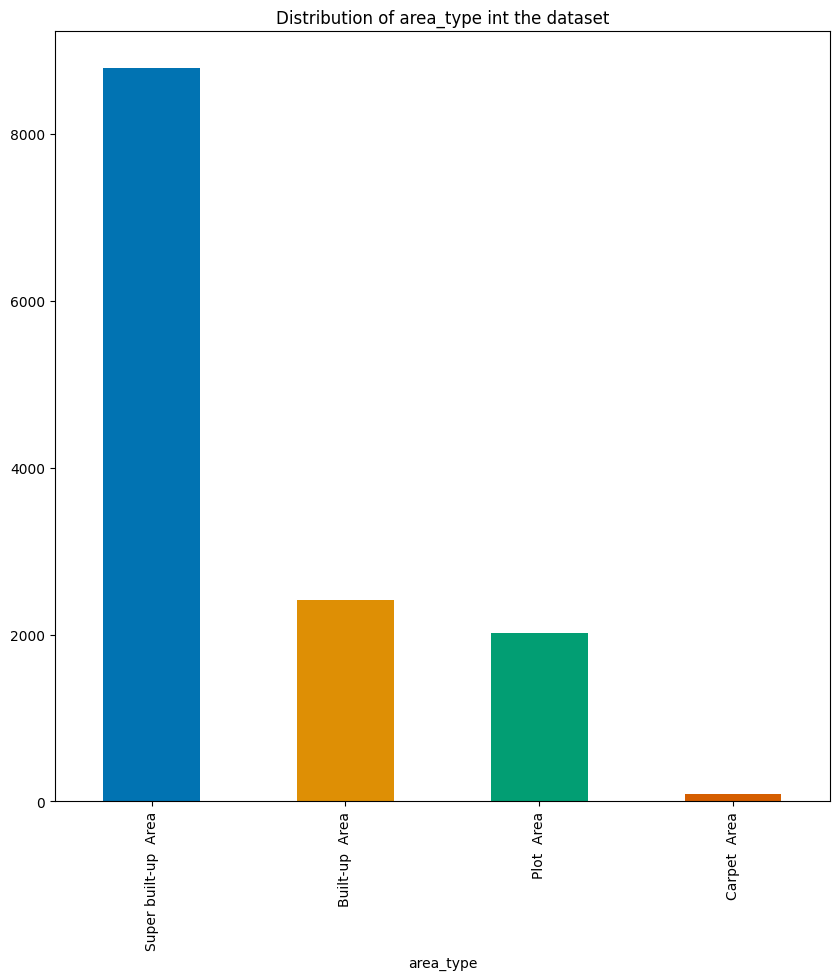

In [28]:
univariate_bar(data, 'area_type')

In [29]:
categorical_features = [col for col in data.columns if data[col].dtype == 'O']
categorical_features

['area_type', 'location', 'society']

In [30]:
numerical_features = [col for col in data.columns if data[col].dtype != 'O']
numerical_features

['total_sqft', 'bath', 'balcony', 'price', 'bed']

## Bath

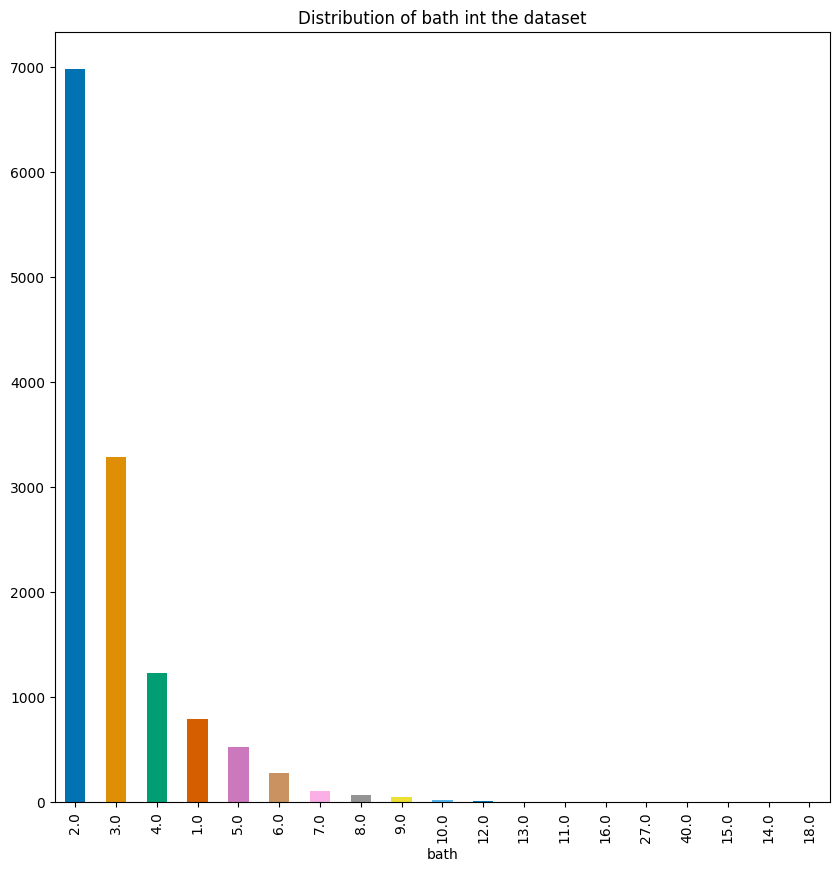

In [31]:
univariate_bar(data, 'bath')

## Bed

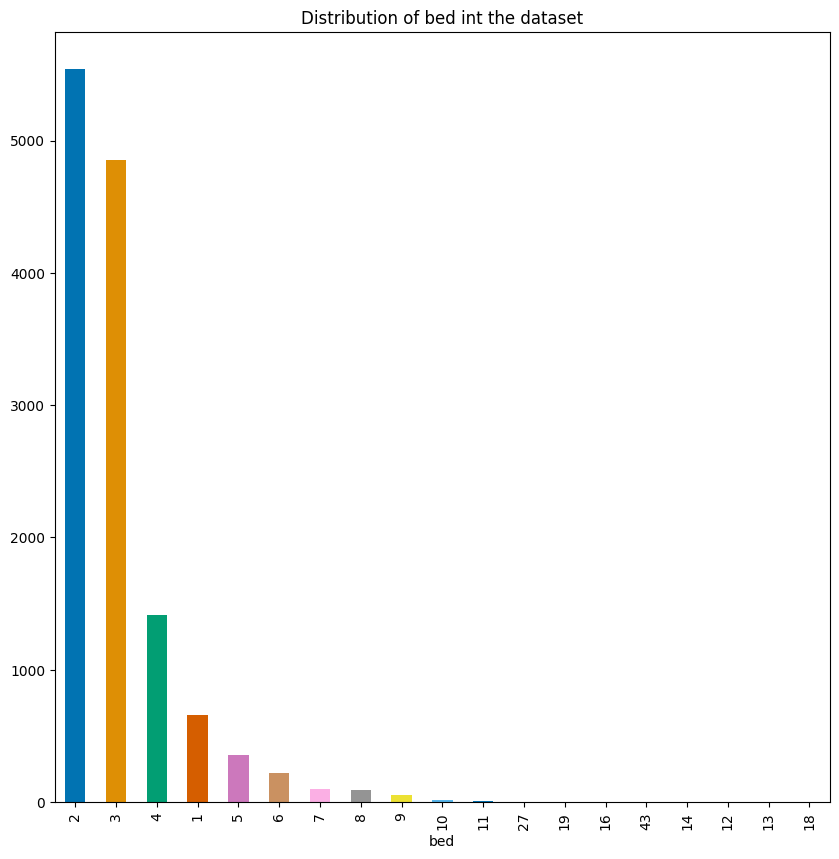

In [32]:
univariate_bar(data, 'bed')

Histplot

<Axes: xlabel='total_sqft', ylabel='Count'>

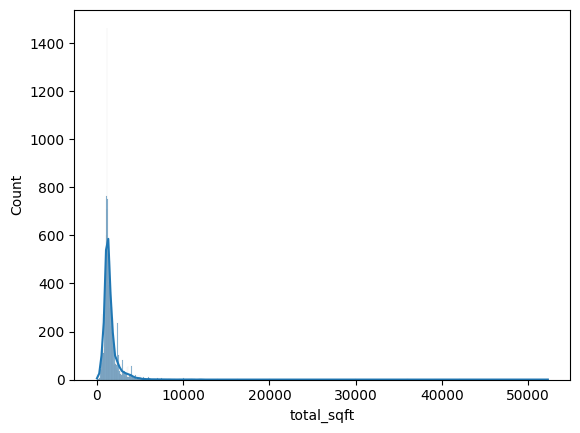

In [33]:
sns.histplot(data=data.total_sqft, kde=True)

In the dataset total_sqft is right skewed.

In [34]:
# Lets see the skewness of the numerical features
data[numerical_features].skew()

total_sqft    15.281752
bath           4.237801
balcony       -0.058782
price          8.064469
bed            4.823510
dtype: float64

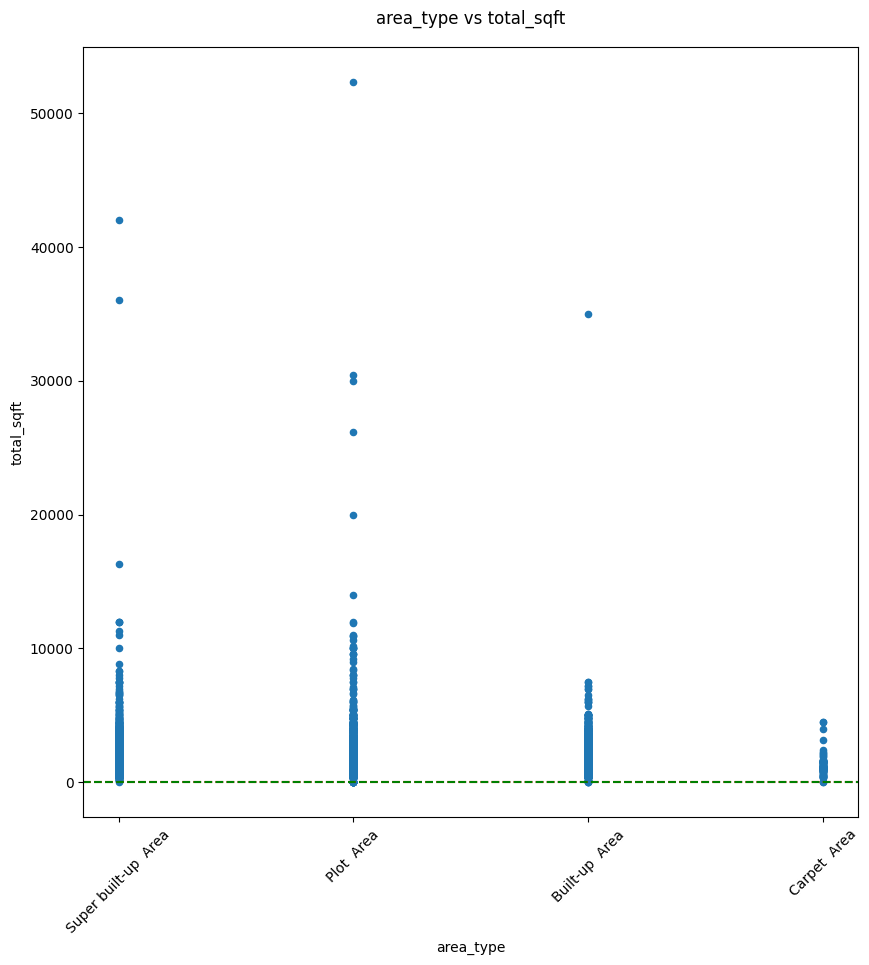

In [35]:
ax = data.plot.scatter(x='area_type', y='total_sqft', rot=45, figsize=(10,10))
ax.set_title('area_type vs total_sqft',y=1.02)
ax.axhline(y=13, c="r", linestyle="dashed")
ax.axhline(y=16, c="g", linestyle="dashed")

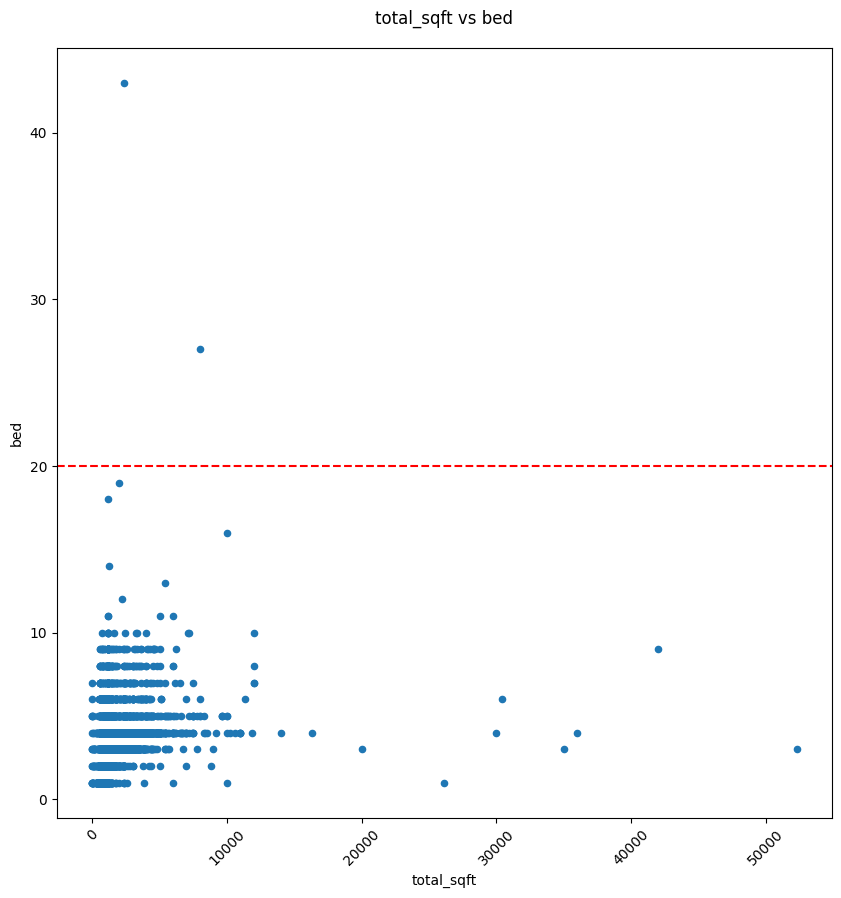

In [36]:
ax = data.plot.scatter(x='total_sqft', y='bed', rot=45, figsize=(10,10))
ax.set_title('total_sqft vs bed',y=1.02)
ax.axhline(y=20, c="r", linestyle="dashed")


- In 10000 sqft more than 20 beds looks like an error and 6 beds in 50000 sq ft is also an error.


In [37]:
data['bath'].unique

<bound method Series.unique of 0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13320, dtype: float64>

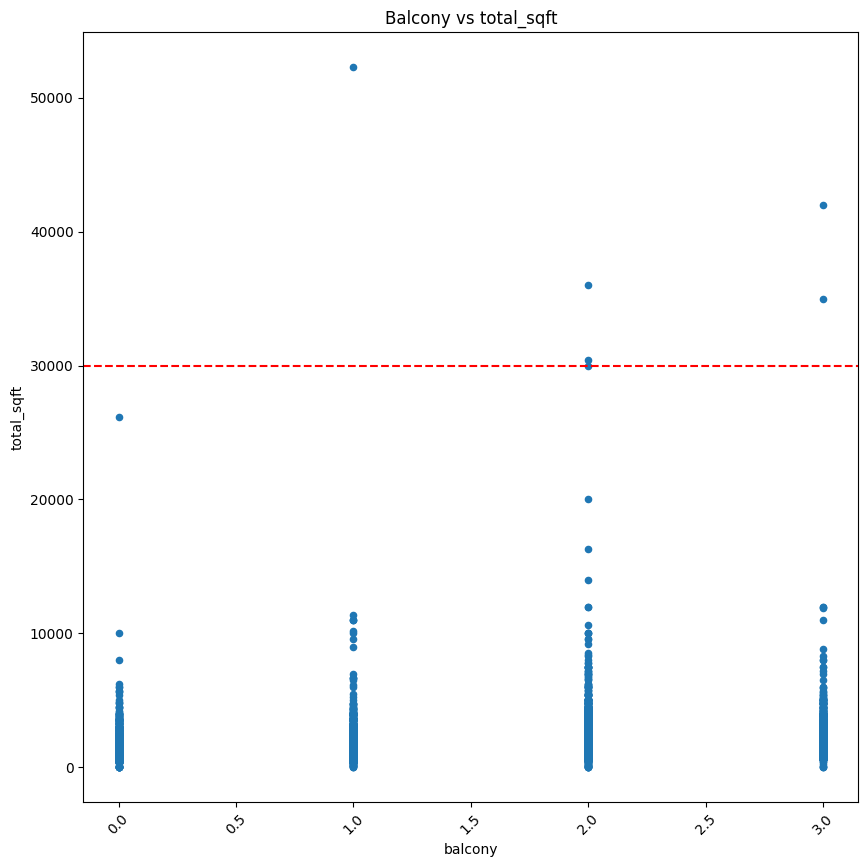

In [38]:
ax = data.plot.scatter(x='balcony', y = 'total_sqft', rot=45,figsize=(10,10))
ax.set_title('Balcony vs total_sqft')
ax.axhline(y=30000, c='r', linestyle='dashed')

### Outliers 

In [39]:
# Total_sqft

total_sqft_mean = data.total_sqft.mean()
total_sqft_mean

1552.9470720720722

In [40]:
total_sqft_std = data.total_sqft.std()
total_sqft_std

1236.5915409760778

In [41]:
mean_plus = total_sqft_mean + 3 * total_sqft_std
mean_plus

5262.721695000306

In [42]:
mean_minus = total_sqft_mean - 3 * total_sqft_std
mean_minus

-2156.827550856161

### To detect outlier

In [43]:
data1 = data


In [44]:
data1.shape

(13320, 8)

In [45]:
out = data1[(data1.total_sqft > mean_plus) | (data1.total_sqft < mean_minus) ]
out.shape

(116, 8)

we successfully detect 116 outliers

In [46]:
out.head()

,area_type,location,society,total_sqft,bath,balcony,price,bed
62,Plot Area,Whitefield,Chranya,5700,5.0,3.0,650.0,4
408,Super built-up Area,Rajaji Nagar,GrrvaGr,12000,6.0,3.0,2200.0,7
440,Plot Area,Whitefield,GrrvaGr,11890,4.0,3.0,700.0,4
514,Plot Area,Banashankari Stage III,GrrvaGr,8500,4.0,2.0,145.0,4
605,Super built-up Area,Malleshwaram,GrrvaGr,12000,7.0,3.0,2200.0,7


In [47]:
data2 = data1[(data1.total_sqft > (-2156.82)) & (data1.total_sqft < 5262.72) ]
data2.shape

(13204, 8)

### let's try using z_score
- It is nothing but how many standard deviation away a datapoints is from mean.

- formula

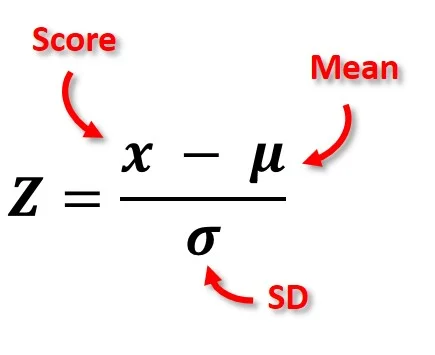

In [48]:
data1.shape

data1['z_score'] = (data1['total_sqft'] - data1.total_sqft.mean()) / data1.total_sqft.std()
data1.head()

,area_type,location,society,total_sqft,bath,balcony,price,bed,z_score
0,Super built-up Area,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2,-0.401868
1,Plot Area,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4,0.846725
2,Built-up Area,Uttarahalli,GrrvaGr,1440,2.0,3.0,62.00,3,-0.091337
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3,-0.025835
4,Super built-up Area,Kothanur,GrrvaGr,1200,2.0,1.0,51.00,2,-0.285419


In [49]:
data3 = data1[(data1.z_score > 10) | (data1.z_score < -10)]
data3

,area_type,location,society,total_sqft,bath,balcony,price,bed,z_score
674,Built-up Area,Yelahanka,Edreelm,35000,3.0,3.0,130.0,3,27.047778
1234,Plot Area,Siddapura,Apavea,14000,3.0,2.0,800.0,4,10.065614
1894,Plot Area,Nelamangala,GrrvaGr,52272,2.0,1.0,140.0,3,41.015203
2623,Plot Area,Dodsworth Layout,GrrvaGr,30000,4.0,2.0,2100.0,4,23.004405
5393,Super built-up Area,Doddabommasandra,GrrvaGr,42000,8.0,3.0,175.0,9,32.708499
5469,Super built-up Area,Ulsoor,Roale D,36000,4.0,2.0,450.0,4,27.856452
7242,Plot Area,Yelahanka,GrrvaGr,26136,1.0,0.0,150.0,1,19.879687
7947,Plot Area,JP Nagar,GrrvaGr,20000,3.0,2.0,175.0,3,14.917661
12470,Super built-up Area,Nagashetty Halli,GrrvaGr,16335,4.0,2.0,149.0,4,11.953869
12987,Plot Area,Dodsworth Layout,GrrvaGr,30400,4.0,2.0,1824.0,6,23.327875


### z_score helps us find outlier in more effieient way.
- we can see in the first row, total_sqft is 35000 adn bath, bed, balcony is 3 and price is just 130, which is irrelevent.

In [50]:
# Removing outliers with z_score

data3 = data1[(data1.z_score < 10) & (data1.z_score > -10)]

In [51]:
data3.shape

(13310, 9)

### our previous shape was (13320, 8), now it is (13310, 9) we succesfully removed 10 outliers.
### Now I will drop zcore for the dataset 

In [52]:
data3.drop('z_score', axis=1, inplace=True)

/tmp/ipykernel_13338/1601917531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop('z_score', axis=1, inplace=True)


In [53]:
data3.head()

,area_type,location,society,total_sqft,bath,balcony,price,bed
0,Super built-up Area,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,GrrvaGr,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,GrrvaGr,1200,2.0,1.0,51.00,2


In [54]:
data3.shape

(13310, 8)

In [55]:
data3.sample(50)

,area_type,location,society,total_sqft,bath,balcony,price,bed
13054,Super built-up Area,Haralur Road,GrrvaGr,1243,2.0,2.0,46.00,2
12831,Super built-up Area,Abbigere,SLtias,1000,2.0,1.0,41.00,2
4776,Super built-up Area,Chandapura,SunceEs,975,2.0,1.0,24.86,2
11444,Super built-up Area,Yelahanka,GrrvaGr,1590,2.0,2.0,54.00,3
2244,Plot Area,Kammasandra,Daden G,1200,2.0,1.0,66.00,2
5554,Super built-up Area,ISRO Layout,Shhin S,1310,2.0,3.0,68.00,3
5994,Super built-up Area,Kanakpura Road,PuandHi,1843,3.0,2.0,85.00,3
13010,Super built-up Area,Gottigere,SMshi M,1245,2.0,2.0,59.00,2
9751,Super built-up Area,Electronic City,GMown E,1070,2.0,1.0,48.00,2
3783,Super built-up Area,Thanisandra,Bhe 2ko,1183,2.0,1.0,59.74,2


## Feature Engineering

In [56]:
dataset = data3.copy()

In [57]:
dataset.head()

,area_type,location,society,total_sqft,bath,balcony,price,bed
0,Super built-up Area,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,GrrvaGr,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,GrrvaGr,1200,2.0,1.0,51.00,2


In [58]:
dataset['price_per_sqft'] = dataset['price']*100000 / dataset['total_sqft']
dataset.head()

,area_type,location,society,total_sqft,bath,balcony,price,bed,price_per_sqft
0,Super built-up Area,Electronic City Phase II,Coomee,1056,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,Theanmp,2600,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,GrrvaGr,1440,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,Soiewre,1521,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,GrrvaGr,1200,2.0,1.0,51.00,2,4250.000000


In [59]:
categorical_features

['area_type', 'location', 'society']

In [60]:
numerical_features

['total_sqft', 'bath', 'balcony', 'price', 'bed']

In [61]:
dataset.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [62]:
dataset.location.unique().size

1306

- For categorical_column 1306 unique value is a big number to handle
- Usually I convert text data into dummies columns, if I keep all these locations I wil have around 1300 columns, it will be too much. It is also called dimensionality curse or high dimensionality problem   

In [63]:
dataset.society.unique().size

2686

In [64]:
# locations
# Remove whitespace
dataset['location'] = dataset.location.apply(lambda x: x.strip())

In [65]:
location_status = dataset.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_status

location
Whitefield               541
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road            1
Kanakapura Road,           1
Kanakapura main  Road      1
whitefiled                 1
Name: location, Length: 1295, dtype: int64

In [66]:
len(location_status[location_status ==1])

474

In [67]:
len(location_status[location_status <=10])

1054

### There are 1054 rows which location_count are less than 10, I will set all those rows to others_location so that it will be easy to perform onehotencoding.

In [68]:
less_10 = location_status[location_status <=10]
less_10

location
Sector 1 HSR Layout      10
Dairy Circle             10
Nagappa Reddy Layout     10
Naganathapura            10
Nagadevanahalli          10
                         ..
1 Giri Nagar              1
Kanakapura Road           1
Kanakapura Road,          1
Kanakapura main  Road     1
whitefiled                1
Name: location, Length: 1054, dtype: int64

In [69]:
dataset['location'] = dataset.location.apply(lambda x: 'others' if x  in less_10 else x)
len(dataset.location.unique())

242

In [73]:
# society
# Removin whitespace

dataset.location = dataset.location.apply(lambda x: x.strip())

In [78]:
society_status = dataset.groupby('society')['society'].count().sort_values(ascending=False)
society_status
print(len(society_status))


2686


In [81]:
less_than_8 = society_status[society_status<=8]
less_than_8.size

2513

In [82]:
dataset.society = dataset.society.apply(lambda x: 'other_society' if x in less_than_8 else x)
dataset.society.unique().size

174

Therefore 2686 rows is reduced to 174

In [83]:
dataset.to_csv('cleaned_bengalure_ds.csv')